### 피봇 테이블 만들기 

In [17]:
import pandas as pd 

df1 = pd.read_csv('관서별_5대범죄_발생_및_검거_현황_2000_2016_/2000년.csv', engine="python")
df1.head()

,구분,죄종,발생검거,건수,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,중부,살인,발생,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,중부,살인,검거,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,중부,강도,발생,17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,중부,강도,검거,15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,중부,강간,발생,14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df1 = df1.T.dropna().T
df1.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,17
3,중부,강도,검거,15
4,중부,강간,발생,14


In [30]:
import numpy as np
df2 = pd.pivot_table(df1, 
               index=['구분', '죄종', '발생검거'], 
               values='건수', 
               aggfunc=np.sum)
df2

건수
구분 죄종 발생검거      
강남 강간 검거      70
      발생      78
   강도 검거      72
      발생     146
   살인 검거       4
      발생       3
   절도 검거     523
      발생    2653
   폭력 검거    4345
      발생    4892
강동 강간 검거      58
      발생      62
   강도 검거      40
      발생      49
   살인 검거      11
      발생      12
   절도 검거     671
      발생    1838
   폭력 검거    4333
      발생    4716
강북 강간 검거      48
      발생      47
   강도 검거      48
      발생      47
   살인 검거       8
      발생       9
   절도 검거     458
      발생     859
   폭력 검거    3446
      발생    3624
...          ...
중랑 강간 검거      69
      발생      74
   강도 검거      43
      발생      82
   살인 검거      12
      발생      13
   절도 검거     555
      발생    1042
   폭력 검거    3744
      발생    3887
중부 강간 검거      14
      발생      14
   강도 검거      15
      발생      17
   살인 검거       1
      발생       1
   절도 검거     569
      발생     601
   폭력 검거    1762
      발생    1783
혜화 강간 검거      41
      발생      40
   강도 검거      24
      발생      30
   살인 검거       3
      발생       3
   절도 검거     429
      발생    1239
   폭력 검거    2444
      발생    2631

[310 rows x 1 columns]

In [33]:
df2.loc['강남'].loc['강도'].loc['검거'] / df2.loc['강남'].loc['강도'].loc['발생']

건수    0.493151
dtype: float64

In [38]:
df3 = pd.pivot_table(df1, 
               index=['구분', '발생검거'], 
               values='건수', 
               aggfunc=np.sum)
df3

건수
구분  발생검거      
강남  검거    5014
    발생    7772
강동  검거    5113
    발생    6677
강북  검거    4008
    발생    4586
강서  검거    4623
    발생    6076
관악  검거    3094
    발생    4808
광진  검거    5207
    발생    6442
구로  검거    3501
    발생    4357
금천  검거    5092
    발생    6756
남대문 검거    1438
    발생    1632
노원  검거    2618
    발생    3124
도봉  검거    3018
    발생    3657
동대문 검거    4865
    발생    5279
동작  검거    3661
    발생    4948
마포  검거    4191
    발생    5359
방배  검거    1702
    발생    2354
...        ...
서부  검거    3085
    발생    3914
서초  검거    3074
    발생    3832
성동  검거    3401
    발생    5049
성북  검거    2124
    발생    2574
송파  검거    3700
    발생    5568
수서  검거    3402
    발생    4620
양천  검거    3108
    발생    4358
영등포 검거    3398
    발생    4429
용산  검거    2929
    발생    3855
은평  검거    2356
    발생    2931
종로  검거    2273
    발생    2576
종암  검거    3232
    발생    3859
중랑  검거    4423
    발생    5098
중부  검거    2361
    발생    2416
혜화  검거    2941
    발생    3943

[62 rows x 1 columns]

In [39]:
_crime_dict = dict()

for i in set(df1['구분']):
    rat = df3.loc[i].loc['검거'] / df3.loc[i].loc['발생']
    _crime_dict[i] = rat
    
_crime_dict

{'마포': 건수    0.782049
 dtype: float64, '양천': 건수    0.713171
 dtype: float64, '종암': 건수    0.837523
 dtype: float64, '서대문': 건수    0.832094
 dtype: float64, '중랑': 건수    0.867595
 dtype: float64, '도봉': 건수    0.825267
 dtype: float64, '성북': 건수    0.825175
 dtype: float64, '구로': 건수    0.803535
 dtype: float64, '금천': 건수    0.7537
 dtype: float64, '송파': 건수    0.664511
 dtype: float64, '관악': 건수    0.643511
 dtype: float64, '남대문': 건수    0.881127
 dtype: float64, '은평': 건수    0.803821
 dtype: float64, '서부': 건수    0.788196
 dtype: float64, '종로': 건수    0.882376
 dtype: float64, '노원': 건수    0.838028
 dtype: float64, '광진': 건수    0.808289
 dtype: float64, '동작': 건수    0.739895
 dtype: float64, '서초': 건수    0.802192
 dtype: float64, '중부': 건수    0.977235
 dtype: float64, '용산': 건수    0.759792
 dtype: float64, '동대문': 건수    0.921576
 dtype: float64, '강남': 건수    0.645136
 dtype: float64, '방배': 건수    0.723025
 dtype: float64, '강서': 건수    0.760862
 dtype: float64, '영등포': 건수    0.767216
 dtype: float64, '혜화': 건수 

In [53]:
df5 = pd.DataFrame(_crime_dict).T.sort_values(by='건수', ascending=False)
df5.head()

,건수
중부,0.977235
동대문,0.921576
종로,0.882376
남대문,0.881127
강북,0.873964


In [50]:
pd.DataFrame(_crime_dict).T.sort_values(by='건수').head()

,건수
관악,0.643511
강남,0.645136
송파,0.664511
성동,0.673599
양천,0.713171


In [56]:
df4 = pd.pivot_table(df1, 
               index=['구분'], 
               values='건수', 
               aggfunc=np.sum)
df4['검거율'] = df5
df4.head()

,건수,검거율
구분,,
강남,12786,0.645136
강동,11790,0.765763
강북,8594,0.873964
강서,10699,0.760862
관악,7902,0.643511


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C1A09E8>,
      dtype=object)

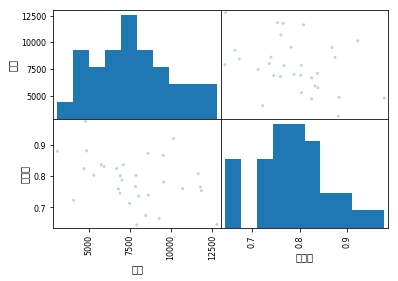

In [60]:
%matplotlib inline 
pd.scatter_matrix(df4, alpha=0.3)

### Titanic Example

In [70]:
test = pd.read_csv('train.csv')
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
test.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [78]:
test.groupby('Pclass')['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [95]:
test['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### #########################

In [126]:
len(test['Sex'][test['Sex'] == 'female'][test['Survived'] == 1]) 

0.2615039281705948

In [130]:
df_class = pd.pivot_table(test, index='Pclass', values=['Name', 'Survived'], aggfunc=np.count_nonzero)
df_class

,Name,Survived
Pclass,,
1,216,136
2,184,87
3,491,119


In [133]:
for i in [1,2,3]:
    print(df_class.loc[i]['Survived'] / df_class.loc[1]['Name'] * 100)

62.96296296296296
40.27777777777778
55.092592592592595


In [137]:
len(test[test['Age'].isnull()])

177